# Data Statistics
Pranshu Gupta

In [113]:
import re
import pickle
import datetime
from datetime import timedelta, date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import math
import numpy as np
import scipy
from scipy.stats import binom, hypergeom
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import time
import math

import matplotlib as mpl
import matplotlib.pyplot as pp
import numpy as np
from itertools import cycle 
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.dates as mdates
import datetime
import nltk

import seaborn as sns
from matplotlib import pyplot as pp
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

def setupMPPTufte():
#     pp.clf()
    pp.rcParams['font.family'] = 'sans-serif'
    pp.rcParams['text.latex.preamble'] = [r'\usepackage[cm]{sfmath}']
    pp.rcParams['font.family'] = 'sans-serif'
    pp.rcParams['text.usetex'] = False
    pp.rcParams['text.latex.unicode']=False
    pp.rcParams['font.sans-serif'] = 'cm'
    pp.rcParams['font.size'] = 24
    pp.rcParams['text.color'] = "#000000"
    pp.rcParams['ytick.labelsize'] = 24
    pp.rcParams['xtick.labelsize'] = 24
    pp.rcParams['ytick.color'] = '#000000'
    pp.rcParams['xtick.color'] = '#000000'
    pp.rcParams['legend.fontsize'] = 24
    pp.rcParams['lines.markersize'] = 14
    pp.rcParams['axes.titlesize'] = 24
    pp.rcParams['axes.labelcolor'] = '#000000'
    pp.rcParams['axes.labelsize'] = 24
    #     plt.rcParams['axes.edgecolor'] = '#f0f0f0'
    pp.rcParams['axes.edgecolor'] = '#525252'
    pp.rcParams['axes.linewidth'] = 1.0
    pp.rcParams['axes.grid'] = False
    #     plt.rcParams['axes.grid'] = True
    #     plt.rcParams['axes.grid.axis'] = "y"
    #     plt.rcParams['grid.linewidth'] = 3.0
    pp.rcParams['grid.color'] = "#FFFFFF"
    pp.rcParams['legend.frameon'] = True
    pp.rcParams['legend.framealpha'] = 0.1
    pp.rcParams['legend.fancybox'] = True    
    pp.rcParams['legend.numpoints'] = 1
    pp.rcParams['legend.scatterpoints'] = 1
    pp.rcParams['legend.facecolor'] = 'none'
    pp.rcParams['figure.figsize'] = 8,8
    pp.gca().spines['top'].set_visible(False)
    pp.gca().spines['bottom'].set_visible(True)
    pp.gca().spines['right'].set_visible(False)
    pp.gca().spines['left'].set_visible(True)
    pp.gca().get_xaxis().tick_bottom()
    pp.gca().get_yaxis().tick_left()
#     pp.tick_params(axis='both', which='major', bottom=True, top=False, labelbottom=True, left=True,
#                   right=False, labelleft=True, length=10, width=2, direction='out',  color='#ffffff')
    pp.tick_params(axis='both', which='major', bottom=False, top=False, labelbottom=True, left=False,
right=False, labelleft=True, length=10, width=2, direction='out',  color='#636363')
    return pp

import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

def cleanSentence(sentence):
    sentence = re.sub(r'(\bwww\..+?(\s|$))', ' ', sentence)
    sentence = re.sub(r'(\bhttps{0,1}\:\/\/.+?(\s|$))', '', sentence)
    sentence = re.sub(r'(@.+?(\b|\s|$))', '', sentence)
    sentence = re.sub(r'\bRT\b', '', sentence)
    sentence = re.sub(r'\s+',' ',sentence)
    sentence = sentence.lower()
    
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)
#    sentence = stem(sentence)

    translator = sentence.maketrans({key: None for key in string.punctuation})
    return sentence.translate(translator)



def writeToFile(fileName, list):
    file = open(fileName, 'w')
    for x in list:
        file.write(str(x)+"\n")
    file.close()

def standardizeVector(vector):
    if np.max(vector)==0:
        return vector
    return (vector - np.min(vector)) / (np.max(vector) - np.min(vector))
    
def logStandardizeVector(vector):
#    print(min(vector), max(vector))
#    return [math.log((x+0.0000001)) for x in vector]
    return [math.log(x) for x in vector]

            
def preProcessDF(df):
    df = df.drop(df.columns[0], axis=1)
    df["tenure"] = logStandardizeVector(df["tenure"].values)
    df["comments_karma"] = standardizeVector(df["comments_karma"].values)
    df["posts_karma"] = standardizeVector(df["posts_karma"].values)
#    df["log_posts_karma"] = logStandardizeVector(df["posts_karma"].values)
    df["norm_num_comments"] = logStandardizeVector(df["num_comments"].values)
    df["norm_num_posts"] = logStandardizeVector(df["num_posts"].values)
    return df

def liwcNormalize(df, liwcCategories):
    for cat in liwcCategories:
        df[cat] = (df[cat]+1)/(df["NumTokens"]+1)
    return df


def getAggDF(initialDF):
    initialDF = initialDF.drop("Date", axis = 1)
    aggColNames = initialDF.columns.values
#    aggDF = pandas.DataFrame(initialDF.groupby(["UserName"])[aggColNames].sum()).reset_index()
#    aggDF = pandas.DataFrame(initialDF.groupby(["UserName", "Date"])[aggColNames].sum()).reset_index()
    aggDF = pandas.DataFrame(initialDF.groupby(["UserName"])[aggColNames].sum()).reset_index()
    return aggDF

def calculateDc(colName, df, key, matchedDict):
    vec1 = df[df[key].isin(matchedDict.keys())][colName].values
    vec2 = df[df[key].isin(matchedDict.values())][colName].values
    
    num = np.mean(vec1) - np.mean(vec2)
    den = math.sqrt(abs((math.pow(np.std(vec1),2)+math.pow(np.std(vec2),2))))
    
    val = num/den
    return val

#def calculateCohensD(colName, df, matchedAuthorDict):
def calculateCohensD(colName, df, key, matchedDict, isStandardize):
    
    print(colName, key)
#    return 0
    vec1 = df[df[key].isin(matchedDict.keys())][str(colName)].values
    vec2 = df[df[key].isin(matchedDict.values())][str(colName)].values
    
    if isStandardize:
        vec1 = standardizeVector(vec1)
        vec2 = standardizeVector(vec2)
    
    num = np.mean(vec1) - np.mean(vec2)
    n = len(vec1)
    
    s1 = np.var(vec1)
    s2 = np.var(vec2)
    den = math.sqrt( (s1 + s2 ) / (2))
    
#    den = np.std(df[colName].values)
    
    h = (1-(3/(8*n-9)))
#    print(h)
    
    val = h*num/den
#    print(len(vec1), len(vec2), np.mean(vec1), np.mean(vec2), np.std(vec1), np.std(vec2), val)
    
    print(colName, len(vec1), len(vec2), np.mean(vec1), np.mean(vec2), np.std(vec1), np.std(vec2), round(val, 2))
    return val

def calculateCorrelation(d):
    
    a = 4
    r = d/(d*d + a)
    return r
    


def calculateCI(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
#    m, se = np.median(a), scipy.stats.sem(a)
    h = se * scipy.stats.t._ppf((1+confidence)/2., n-1)
#    return m, m-h, m+h
    return m, h

def getLowessedVector(vector, timeUnix):
#    fracVal = 0.025
    fracVal = 0.3
#    fracVal = 0.05
    lowessedVector = lowess(vector,  timeUnix, is_sorted = True, return_sorted= False, frac=fracVal, it=0)
    return lowessedVector


def getCentralTendencies (vec):
#    print("Length", len(vec), "Mean", np.mean(vec), "Median", np.median(vec), "Stdev.", np.std(vec))
    print("Length", len(vec), "Min", np.min(vec), "Max", np.max(vec), "Mean", np.mean(vec), "Median", np.median(vec), "Stdev.", np.std(vec))

In [114]:
# demographics = pd.read_csv("../data/igtbs_demographics2.csv")
demographics = pd.read_csv("data/igtbs_demographics_complete.csv")
lifeEventDF = pd.read_csv("output/igtbTotalDF_1598288973.0025.csv")
demographics = demographics[demographics.snapshot_id.isin(lifeEventDF.snapshot_id.values)]

In [115]:
# demographics = demographics.merge(feats_full["snapshot_id"], on="snapshot_id")

In [116]:
demographics.columns

Index(['snapshot_id', 'cohort', 'sub_cohort', 'date_enrolled',
       'completed_enrollment', 'dropout', 'dropout_date', 'blinded',
       'IGTB_Date', 'age', 'country', 'gender', 'bornUS', 'lang', 'englyrs',
       'educ', 'jobstat', 'occup', 'occup_24_TEXT', 'supervise',
       'quantsup (how many do you supervise)', 'size (of organization)',
       'duration (how long have you been with your employer)', 'income',
       'org.deviance', 'shipley.abs', 'gats.quantity.sub', 'neuroticism',
       'openness', 'itp', 'gats.status', 'ocb', 'gats.quantity',
       'extraversion', 'agreeableness', 'irb', 'neg.affect', 'stai.trait',
       'inter.deviance', 'conscientiousness', 'audit', 'psqi', 'pos.affect',
       'ipaq', 'shipley.vocab'],
      dtype='object')

In [117]:
cols = ["gender", 
        "age", 
        "educ", 
        "income", 
        "supervise", 
        "occup", 
        "duration (how long have you been with your employer)",
        "shipley.abs", 
        "shipley.vocab", 
        "openness", 
        "conscientiousness",
        "extraversion",
        "agreeableness",
        "neuroticism"
       ]

In [82]:
for col in cols:
    print(col, demographics[col].unique())
    print("")
    
print(len(demographics))

gender ['Female' 'Male']

age [39. 34. 35. 52. 54. 42. 31. 33. 27. 38. 26. 47. 40. 32. 24. 30. 43. 50.
 53. 22. 23. 29. 25. 63. 44. 57. 28. 41. 36. 37. 46. 45. 56. 48. 51. 49.
 55. 58. 60.]

educ ['College degree' "Master's degree" 'Doctoral degree, such as PhD, MD, JD'
 'Some graduate school' 'High school degree (or equivalent)'
 'College Degree' "Master's Degree" 'HS Degree' 'Some College'
 'Some Grad Sch' 'Doctoral Degree']

income ['$50,000 to $74,999' '$100,000 to $124,999' '$75,000 to $99,999'
 'More than $150,000' '$25,000 to $49,999' '$125,000 to $150,000' nan
 '75K to 99,999' '100K to 124,999' '25K to 49,999' '50K to 74,999'
 '> 150K' '125K to 150,000' '< 25K']

supervise ['No' 'Yes']

occup ['Office and Administrative Support Occupations'
 'Education, Training, and Library Services'
 'Arts, Design, Entertainment, Sports, and Media'
 'Healthcare Practitioners and Technical Healthcare Occupations'
 'Business and Financial Operations' 'Management'
 'Computer and Mathematical' 'O

### Gender

Male      121
Female    115
Name: gender, dtype: int64


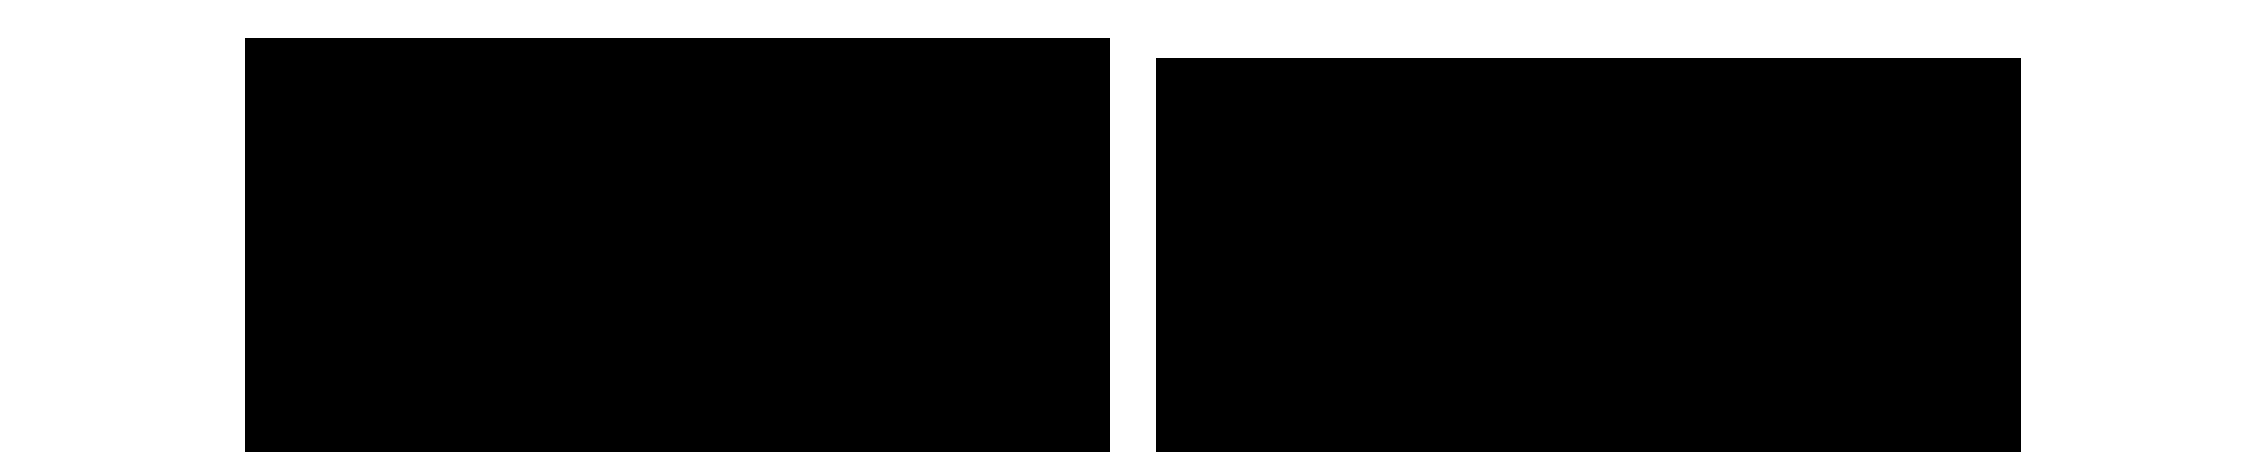

In [83]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()
# beautifyPlot()
demographics["gender"].value_counts().plot.bar(color='#000000', width=0.95)
print(demographics["gender"].value_counts())
plt.xticks([])
plt.yticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig("output/plots/spike_gender.pdf", bbox_inches="tight", transparent=True)
plt.show()

Yes    218
No      18
Name: bornUS, dtype: int64


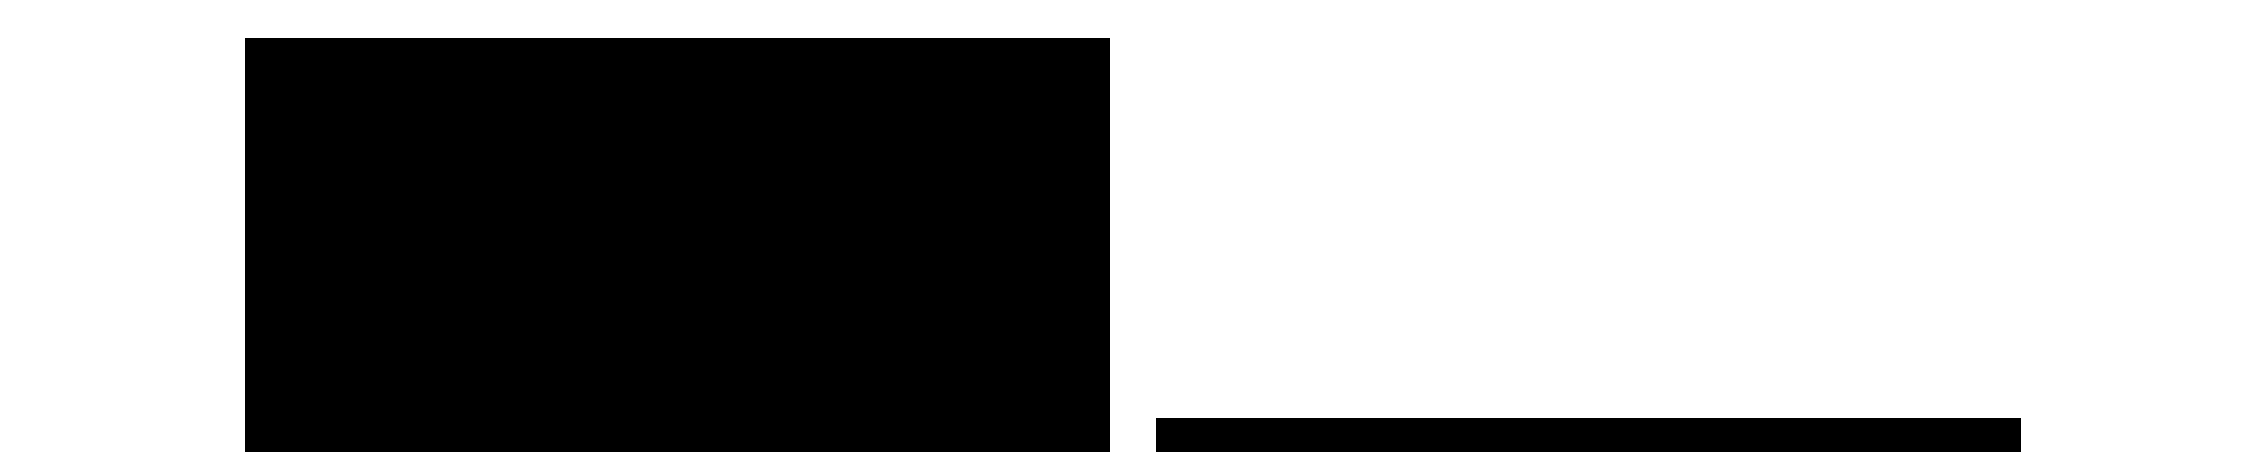

In [112]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()
# beautifyPlot()
demographics["bornUS"].value_counts().plot.bar(color='#000000', width=0.95)
print(demographics["bornUS"].value_counts())
plt.xticks([])
plt.yticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig("output/plots/spike_bornUS.pdf", bbox_inches="tight", transparent=True)
plt.show()

### Age

In [84]:
demographics.age.min(), demographics.age.max(), demographics.age.mean(), demographics.age.std()

(22.0, 63.0, 36.57203389830509, 9.876638118636603)

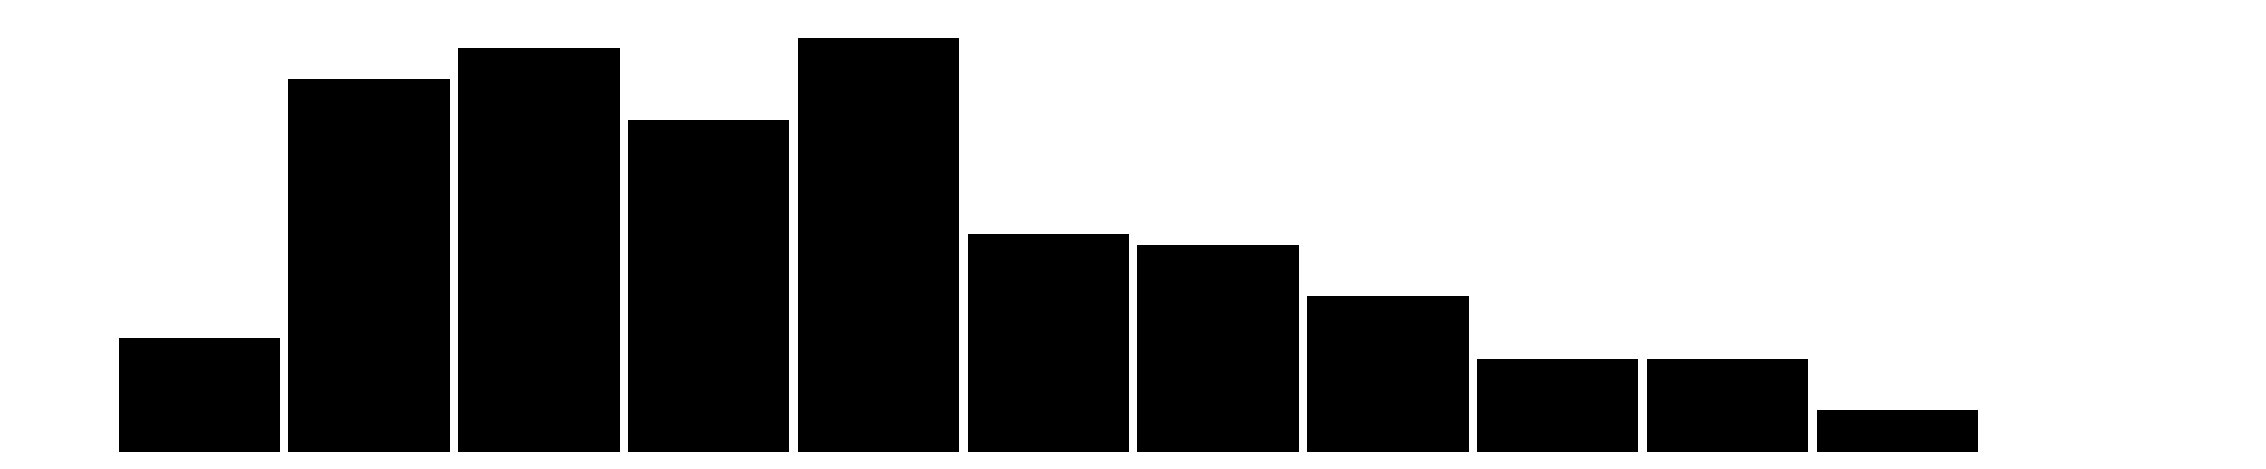

In [85]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()
hist = np.histogram(demographics.age.dropna().values.astype('int'), bins=[i for i in range(20, 70, 4)])
plt.bar(hist[1][:-1], hist[0], color="black", width=3.8)
plt.ylabel("")
plt.yticks([])
plt.xticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
# plt.xlim((20, 65))
plt.savefig("output/plots/spike_age.pdf", bbox_inches="tight",  transparent=True)
plt.show()

### Income

In [86]:
demographics["income"].value_counts()["$50,000 to $74,999"]

39

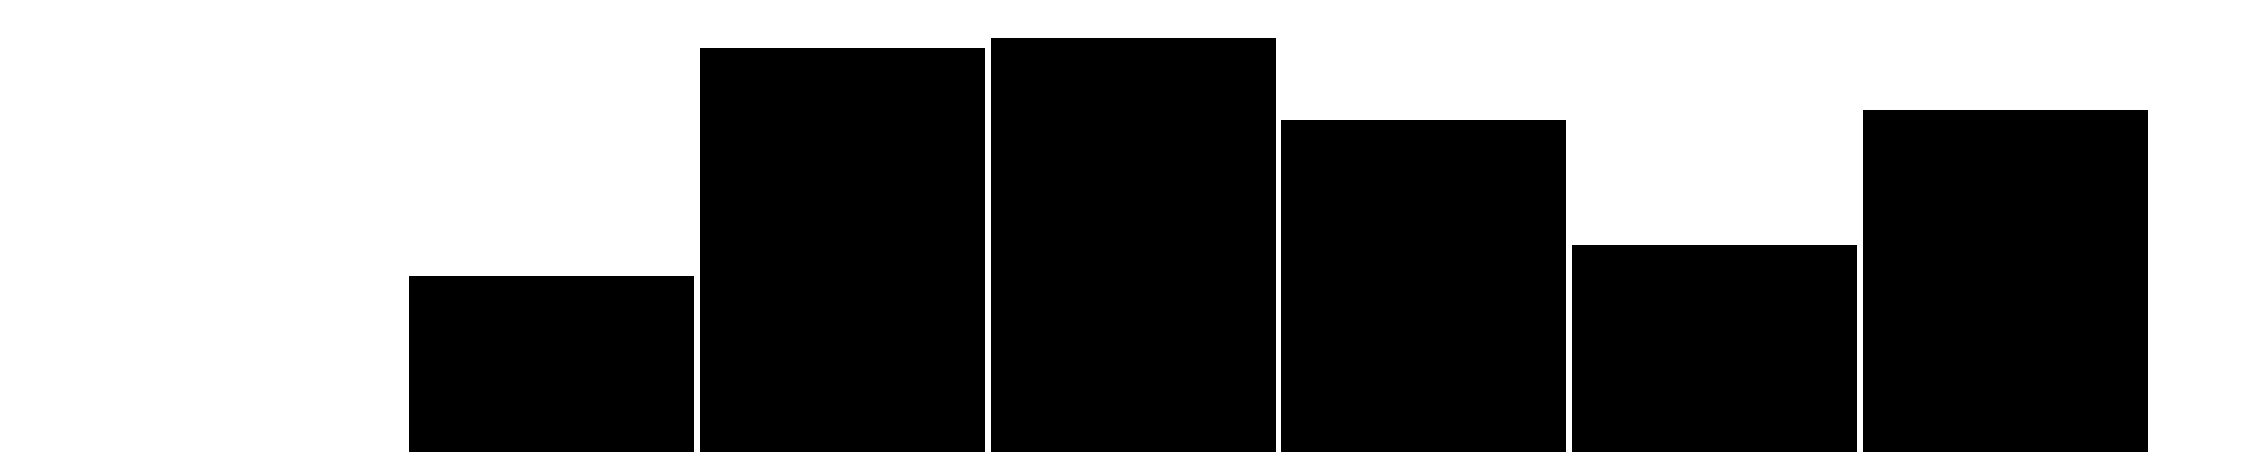

In [87]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()
y = demographics["income"].value_counts()
y['Less than $25,000'] = 0
x = ['Less than $25,000', 
     '$25,000 to $49,999',
     '$50,000 to $74,999',
     '$75,000 to $99,999',
     '$100,000 to $124,999',
     '$125,000 to $150,000',
     'More than $150,000']
plt.bar(x, [y[i] for i in x], width=0.98, color="black")
plt.xticks([])
plt.yticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig("output/plots/spike_income.pdf", bbox_inches="tight", transparent=True)
plt.show()

### Education

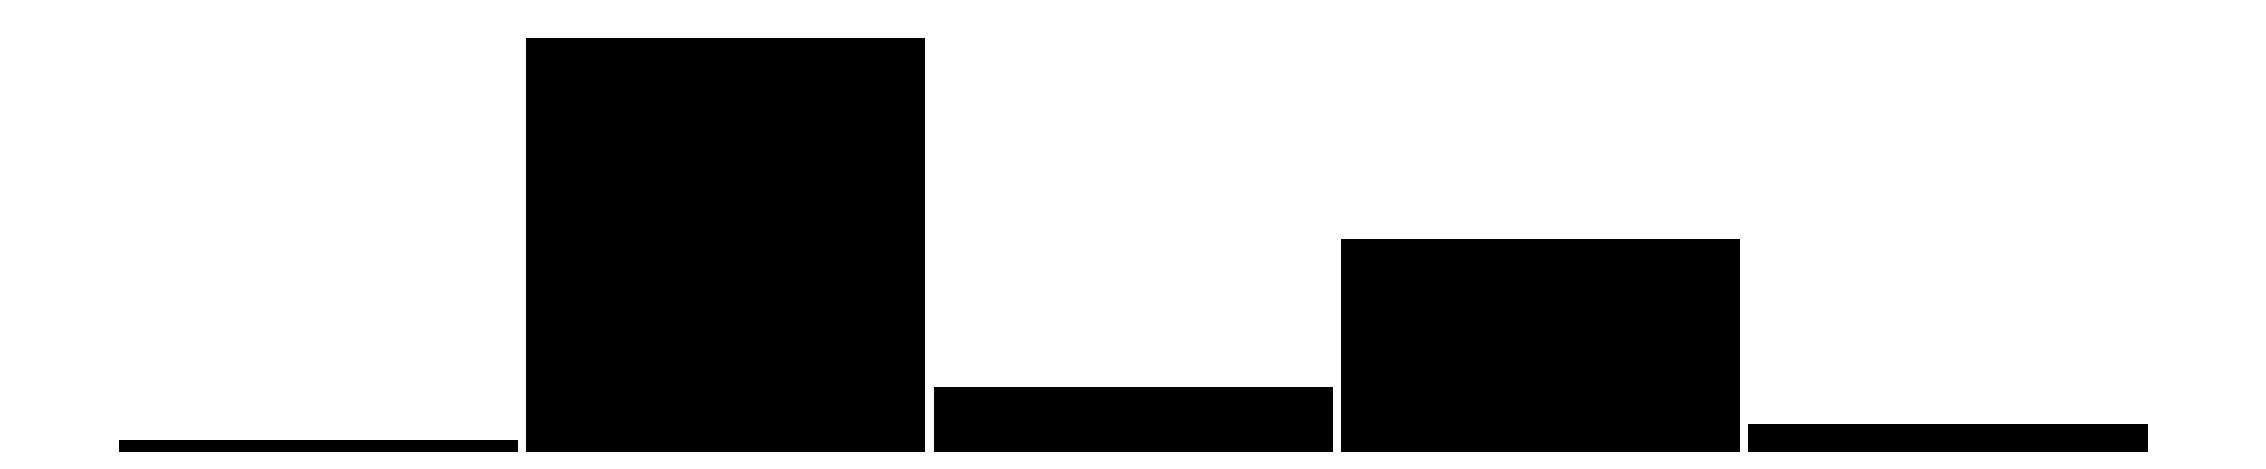

In [88]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
# beautifyPlot()
setupMPPTufte()

y = demographics["educ"].value_counts()
x = ['High school degree (or equivalent)',
     'College degree',
     'Some graduate school',
     "Master's degree",
     'Doctoral degree, such as PhD, MD, JD']
plt.bar(x, [y[i] for i in x], width=0.98, color="black")
plt.xticks([])
plt.yticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig("output/plots/spike_education.pdf", bbox_inches="tight", transparent=True)
plt.show()

### Tenure

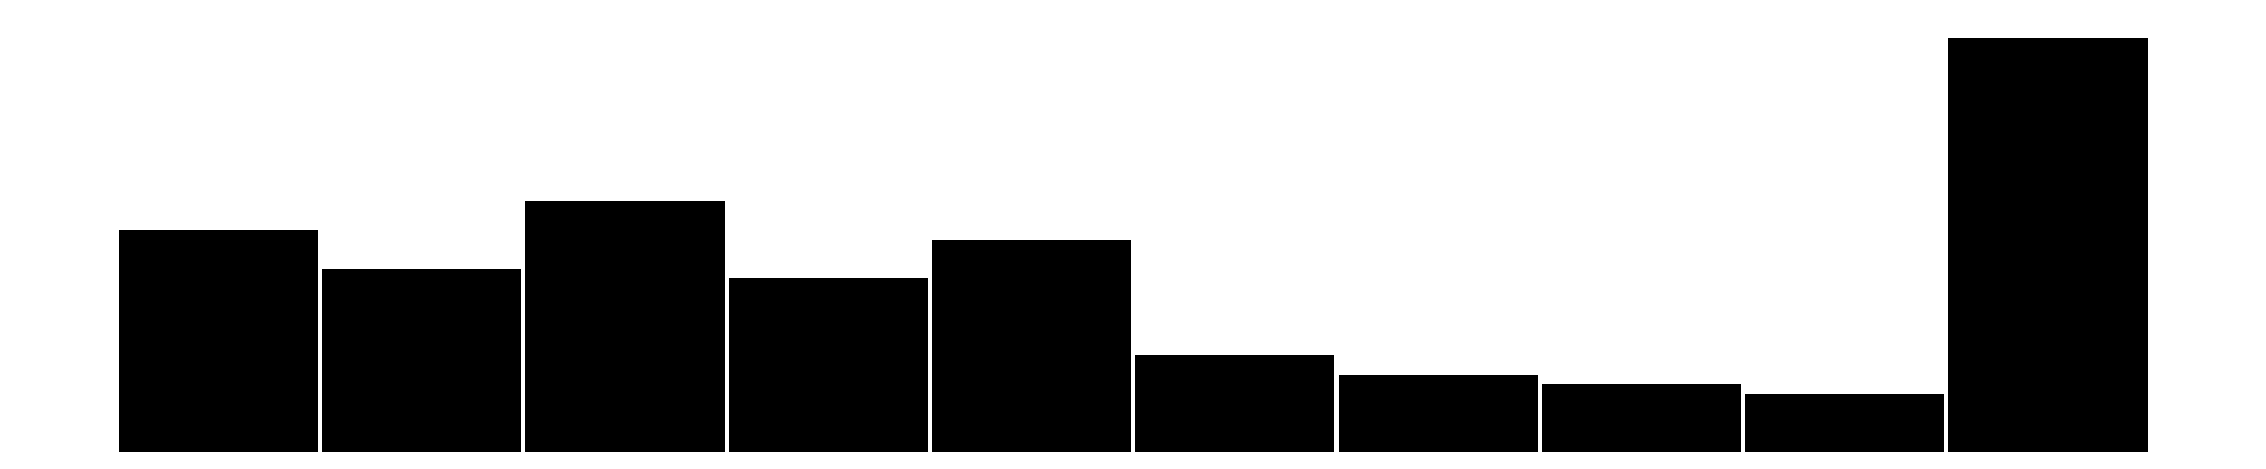

In [89]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()

x = ['Less than a year',
     '1 year',
     '2 years',
     '3 years',
     '4 years',
     '5 years',
     '6 years',
     '7 years',
     '8 years',
     'More than 8 years']
y = demographics["duration (how long have you been with your employer)"].value_counts()
plt.bar(x, [y[i] for i in x], width=0.98, color="black")
plt.xticks([])
plt.yticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig("output/plots/spike_tenure.pdf", bbox_inches="tight", transparent=True)
plt.show()

### Supervise

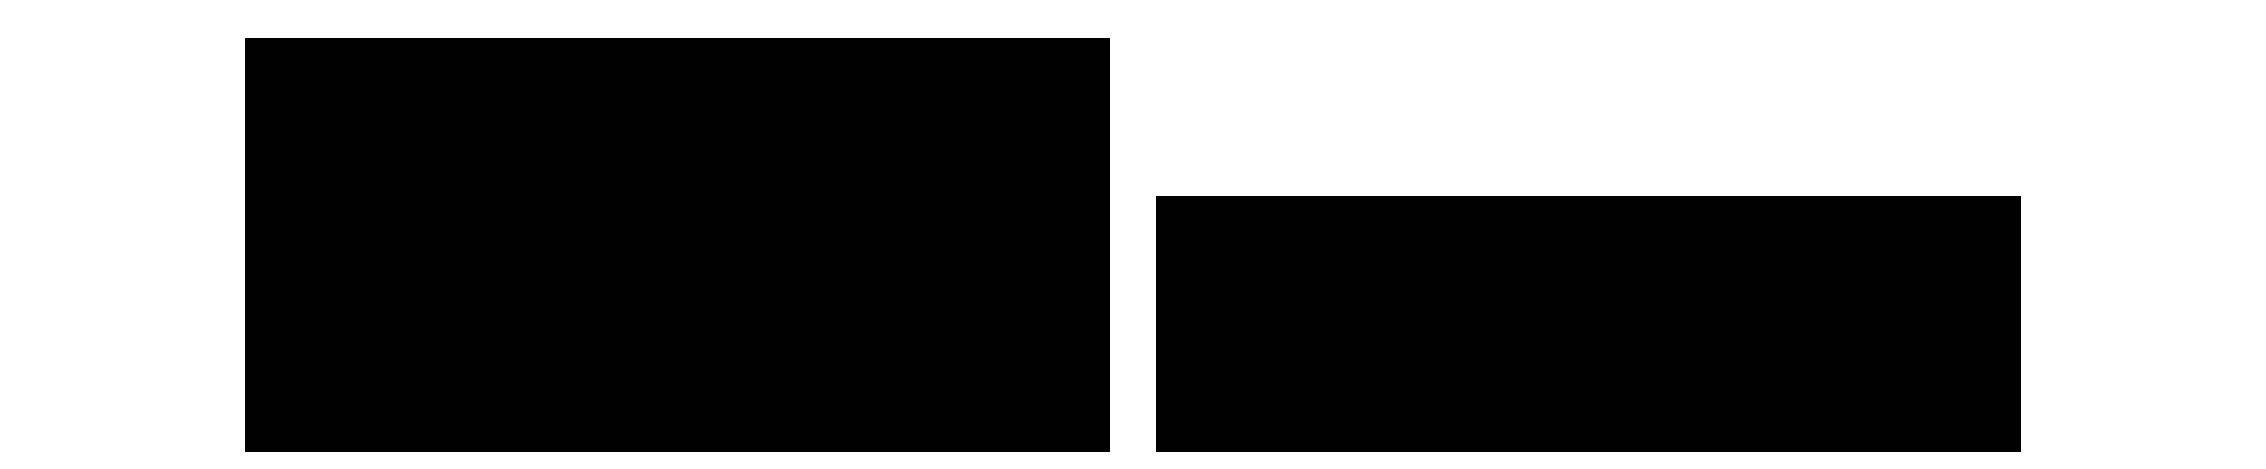

In [90]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()

demographics["supervise"].value_counts().plot.bar(color='#000000', width=0.95)
plt.xticks([])
plt.yticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig("output/plots/spike_supervise.pdf", bbox_inches="tight", transparent=True)
plt.show()
# NO YES

### Shipley.Abs

In [91]:
demographics["shipley.abs"].min(), demographics["shipley.abs"].max(), demographics["shipley.abs"].mean(), demographics["shipley.abs"].std()

(5.0, 24.0, 16.93220338983051, 2.9383127697582894)

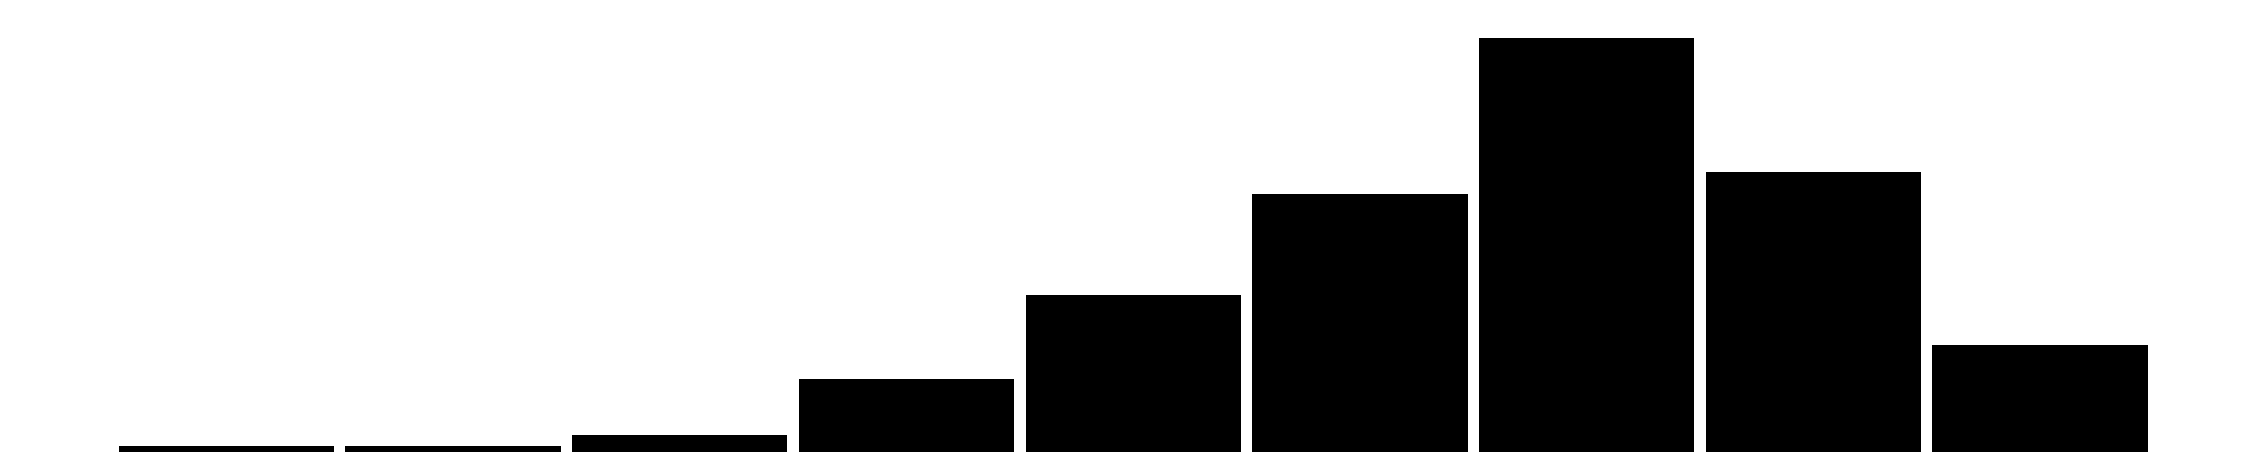

In [92]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()

hist = np.histogram(demographics["shipley.abs"].dropna().values.astype('int'), 
                    bins=[i for i in range(int(demographics["shipley.abs"].min()), int(demographics["shipley.abs"].max())+1, 2)])
plt.bar(hist[1][:-1], hist[0], color="black", width=1.9)
plt.ylabel("")
plt.yticks([])
plt.xticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
# plt.xlim((20, 65))
plt.savefig("output/plots/spike_shipley_abs.pdf", bbox_inches="tight", transparent=True)
plt.show()

### Shipley.Vocab

In [93]:
demographics["shipley.vocab"].min(), demographics["shipley.vocab"].max(), demographics["shipley.vocab"].mean(), demographics["shipley.vocab"].std()

(22.0, 40.0, 33.70762711864407, 3.3177961611212363)

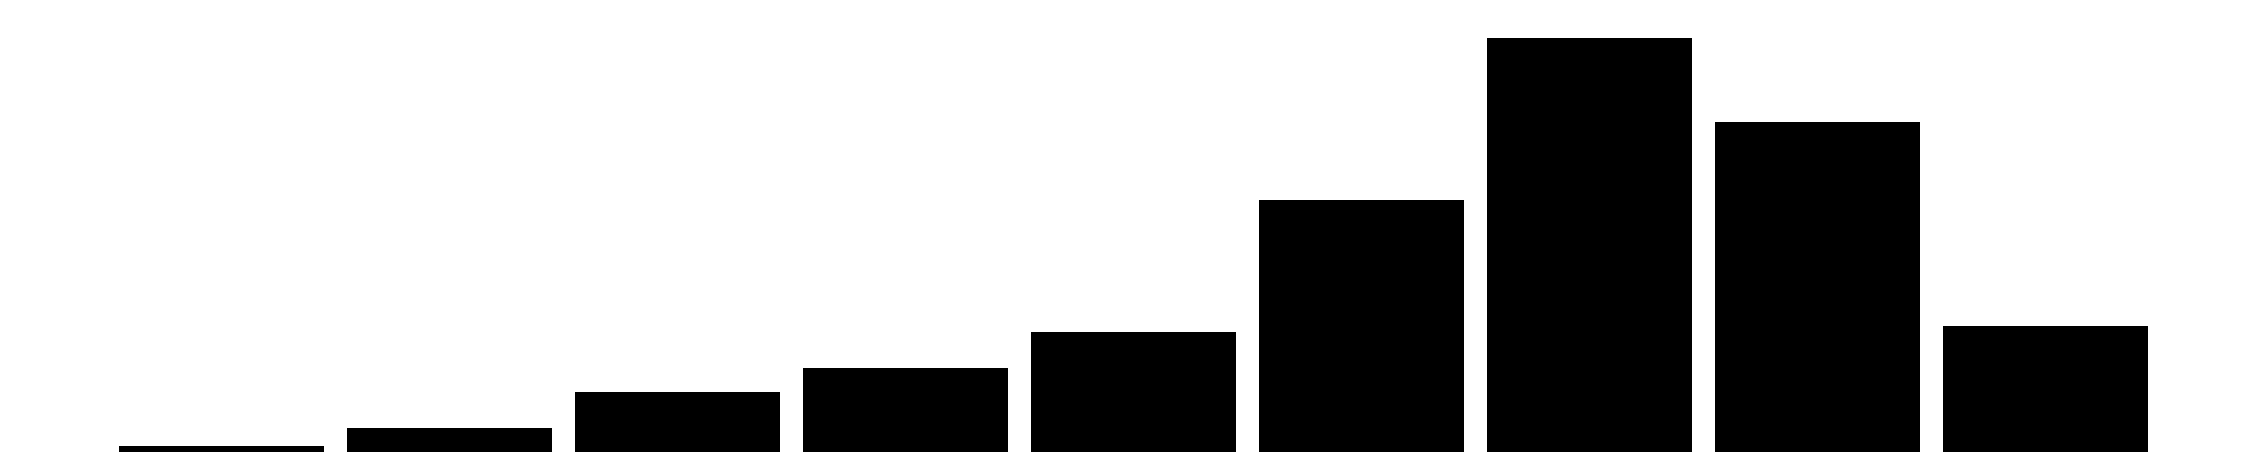

In [94]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()

hist = np.histogram(demographics["shipley.vocab"].dropna().values.astype('int'), 
                    bins=[i for i in range(int(demographics["shipley.vocab"].min()), int(demographics["shipley.vocab"].max())+1, 2)])
plt.bar(hist[1][:-1], hist[0], color="black", width=1.8)
plt.ylabel("")
plt.yticks([])
plt.xticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
# plt.xlim((20, 65))
plt.savefig("output/plots/spike_shipley_vocab.pdf", bbox_inches="tight", transparent=True)
plt.show()

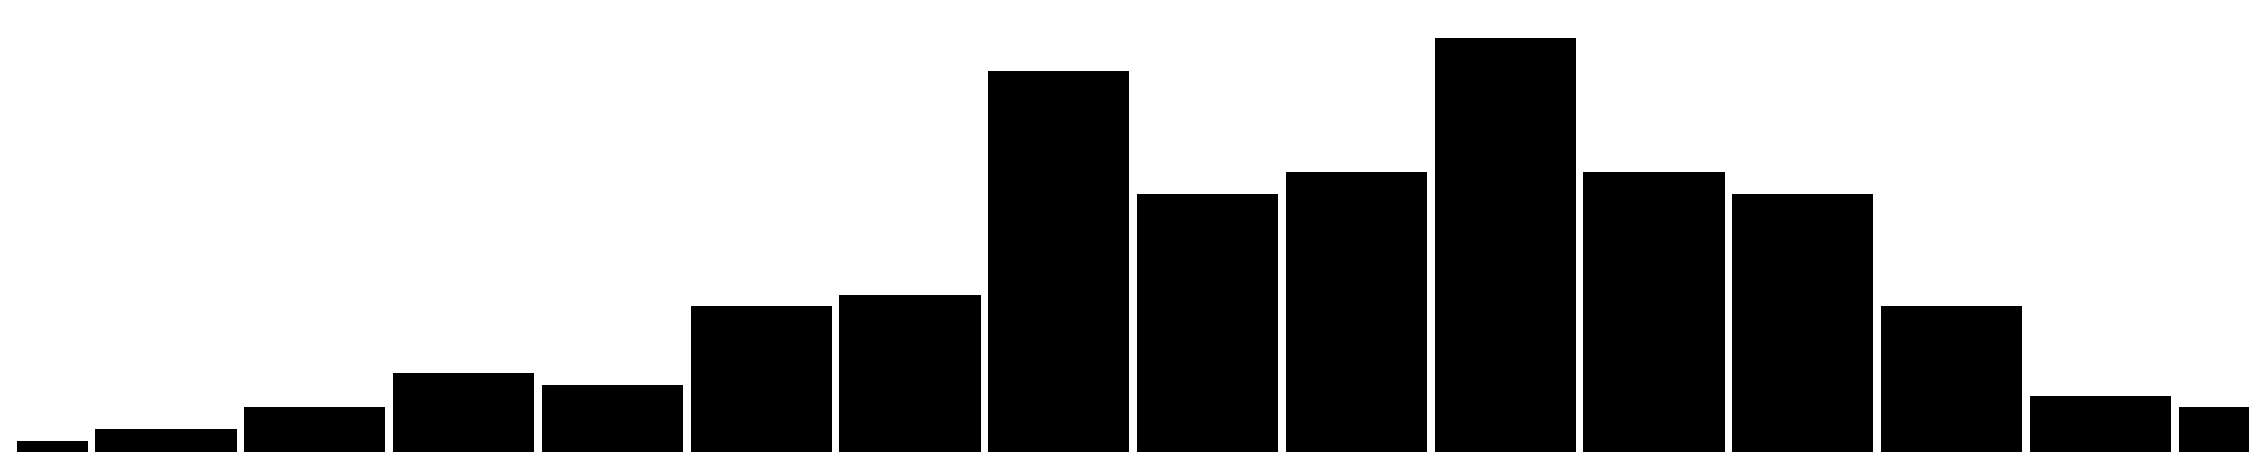

In [95]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()

hist = np.histogram(demographics["openness"].dropna().values, 
                    bins=np.array([i for i in range(0, 60, 2)])/10)
plt.bar(hist[1][:-1], hist[0], color="black", width=0.19)
plt.ylabel("")
plt.yticks([])
plt.xticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlim((2, 5))
plt.savefig("output/plots/spike_openness.pdf", bbox_inches="tight", transparent=True)
plt.show()

In [96]:
demographics["openness"].min(), demographics["openness"].max(), demographics["openness"].mean(), demographics["openness"].std()

(2.166666667, 5.0, 3.8481638418121467, 0.5903210005154342)

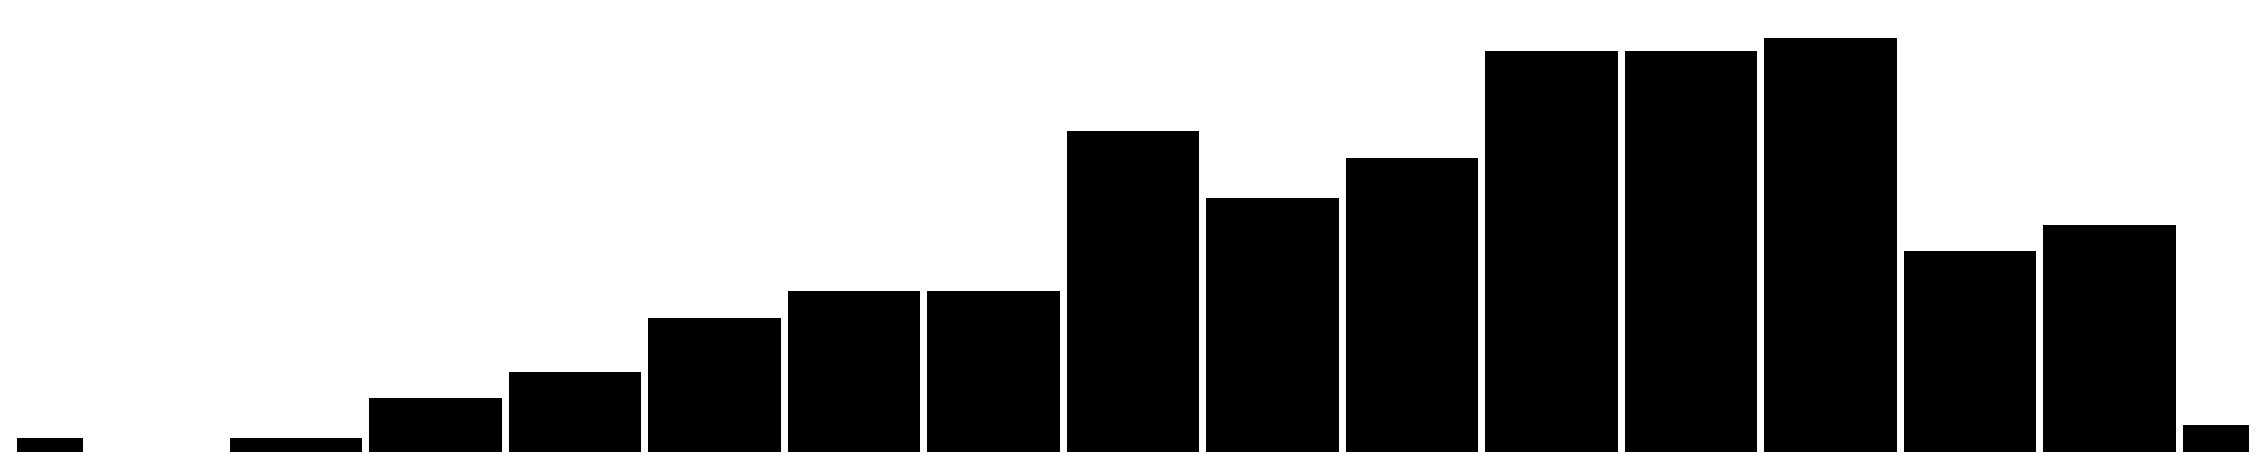

In [97]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()

hist = np.histogram(demographics["conscientiousness"].dropna().values, 
                    bins=np.array([i for i in range(0, 60, 2)])/10)
plt.bar(hist[1][:-1], hist[0], color="black", width=0.19)
plt.ylabel("")
plt.yticks([])
plt.xticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlim((1.8, 5))
plt.savefig("output/plots/spike_conscientiousness.pdf", bbox_inches="tight", transparent=True)
plt.show()

In [98]:
demographics["conscientiousness"].min(), demographics["conscientiousness"].max(), demographics["conscientiousness"].mean(), demographics["conscientiousness"].std()

(1.916666667, 5.0, 3.9357344632867233, 0.6293088836333491)

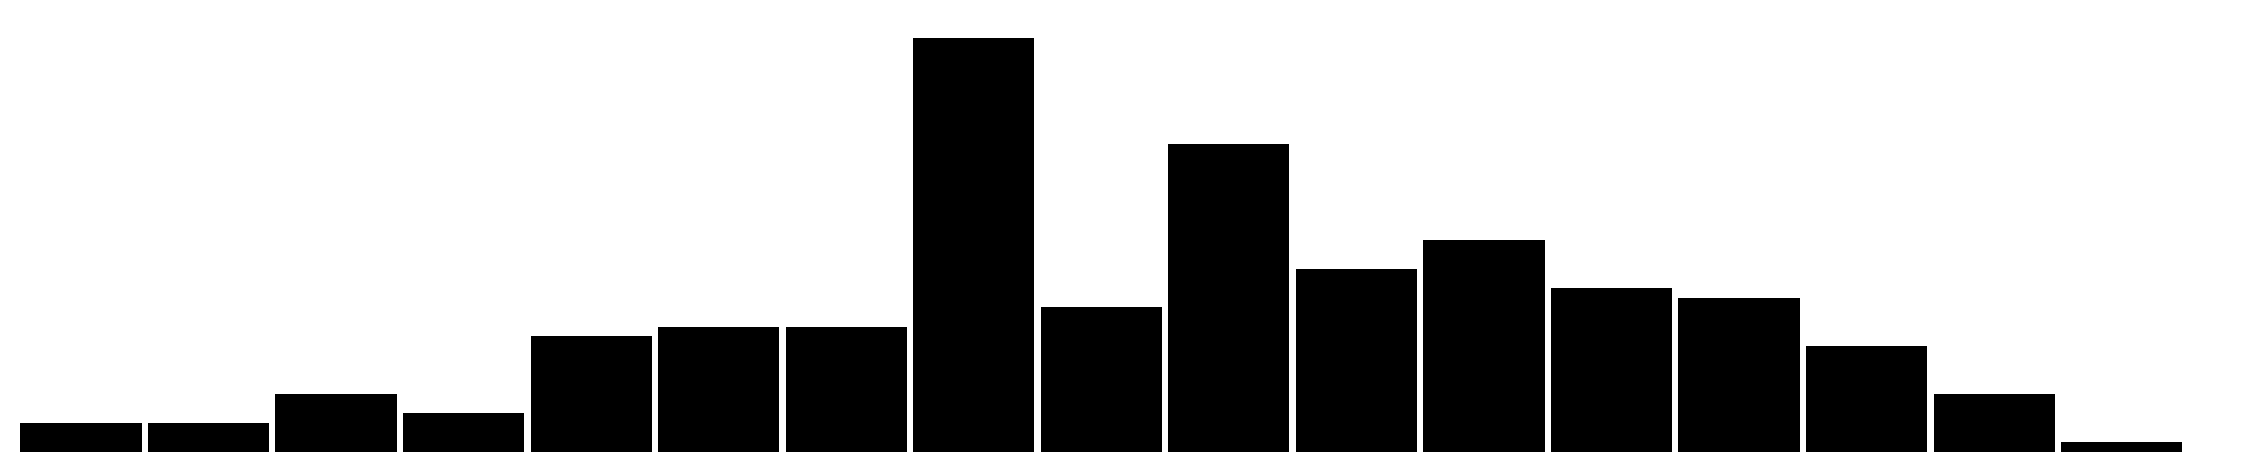

In [99]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()

hist = np.histogram(demographics["extraversion"].dropna().values, 
                    bins=np.array([i for i in range(0, 60, 2)])/10)
plt.bar(hist[1][:-1], hist[0], color="black", width=0.19)
plt.ylabel("")
plt.yticks([])
plt.xticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlim((1.5, 5))
plt.savefig("output/plots/spike_extraversion.pdf", bbox_inches="tight", transparent=True)
plt.show()

In [100]:
demographics["extraversion"].min(), demographics["extraversion"].max(), demographics["extraversion"].mean(), demographics["extraversion"].std()

(1.666666667, 4.916666667, 3.4170197740183617, 0.6802906607083739)

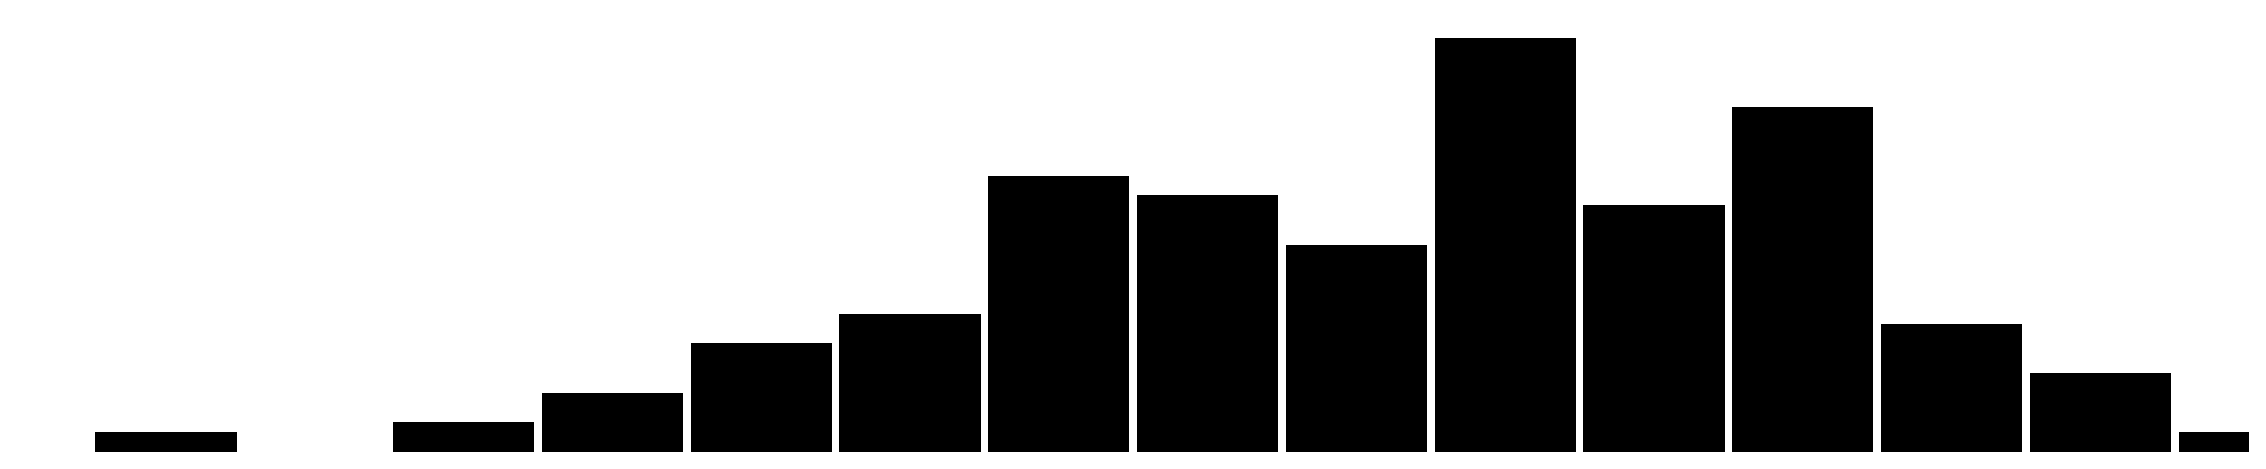

In [101]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()

hist = np.histogram(demographics["agreeableness"].dropna().values, 
                    bins=np.array([i for i in range(0, 60, 2)])/10)
plt.bar(hist[1][:-1], hist[0], color="black", width=0.19)
plt.ylabel("")
plt.yticks([])
plt.xticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlim((2, 5))
plt.savefig("output/plots/spike_agreeableness.pdf", bbox_inches="tight", transparent=True)
plt.show()

In [102]:
demographics["agreeableness"].min(), demographics["agreeableness"].max(), demographics["agreeableness"].mean(), demographics["agreeableness"].std()

(2.25, 5.0, 3.9502118644138418, 0.5470412160318396)

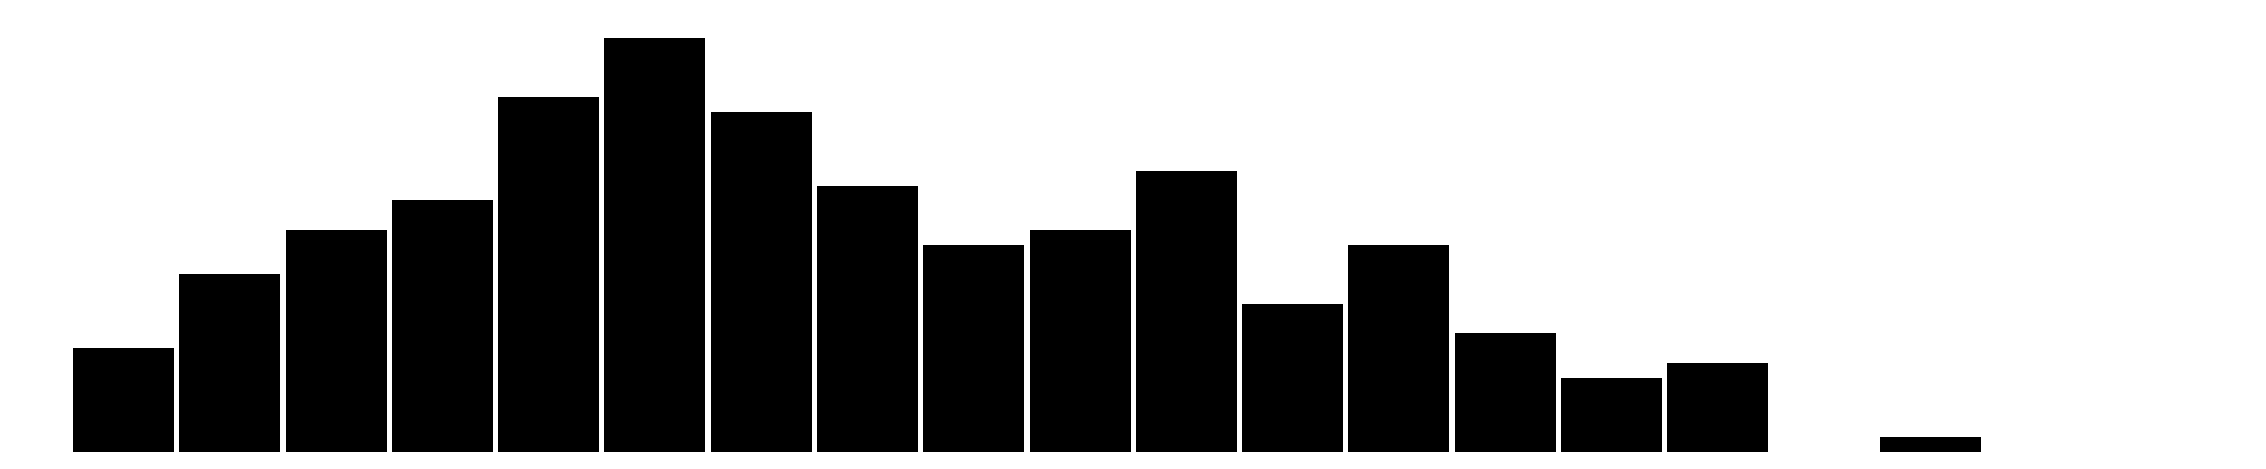

In [103]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()

hist = np.histogram(demographics["neuroticism"].dropna().values, 
                    bins=np.array([i for i in range(0, 60, 2)])/10)
plt.bar(hist[1][:-1], hist[0], color="black", width=0.19)
plt.ylabel("")
plt.yticks([])
plt.xticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlim((0.8, 5))
plt.savefig("output/plots/spike_neuroticism.pdf", bbox_inches="tight", transparent=True)
plt.show()

In [104]:
demographics["neuroticism"].min(), demographics["neuroticism"].max(), demographics["neuroticism"].mean(), demographics["neuroticism"].std(), len(demographics['neuroticism'])

(1.0, 4.583333333, 2.43785310735452, 0.7792512045649255, 236)

In [105]:
demographics["pos.affect"].min(), demographics["pos.affect"].max(), demographics["pos.affect"].mean(), demographics["pos.affect"].std()

(13.0, 49.0, 34.23728813559322, 5.699836453199366)

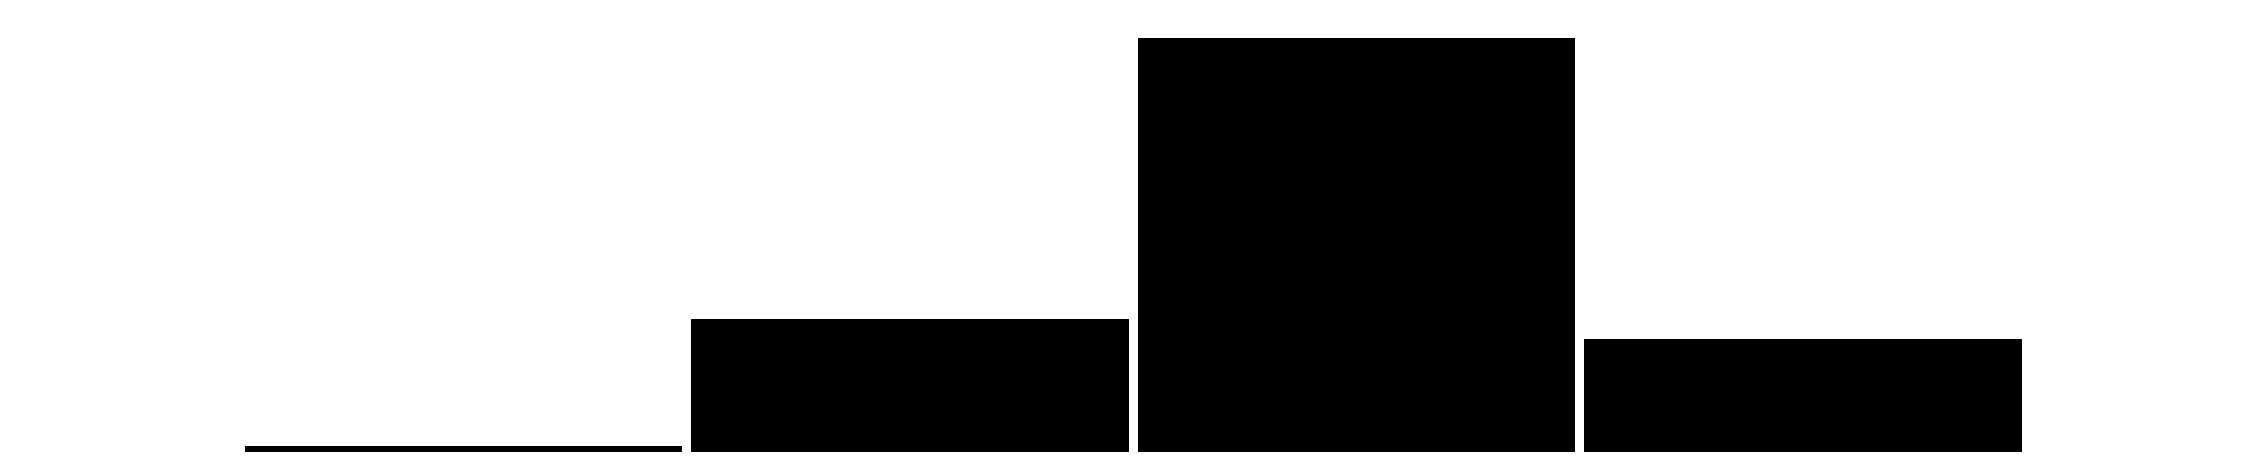

In [106]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()

hist = np.histogram(demographics["pos.affect"].dropna().values, 
                    bins=np.array([i for i in range(0, 60, 10)])/1.0)
plt.bar(hist[1][:-1], hist[0], color="black", width=9.8)
plt.ylabel("")
plt.yticks([])
plt.xticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlim((0, 50))
plt.savefig("output/plots/spike_pos_affect.pdf", bbox_inches="tight", transparent=True)
plt.show()

In [107]:
demographics["neg.affect"].min(), demographics["neg.affect"].max(), demographics["neg.affect"].mean(), demographics["neg.affect"].std()

(10.0, 37.0, 16.826271186440678, 4.6236566162365875)

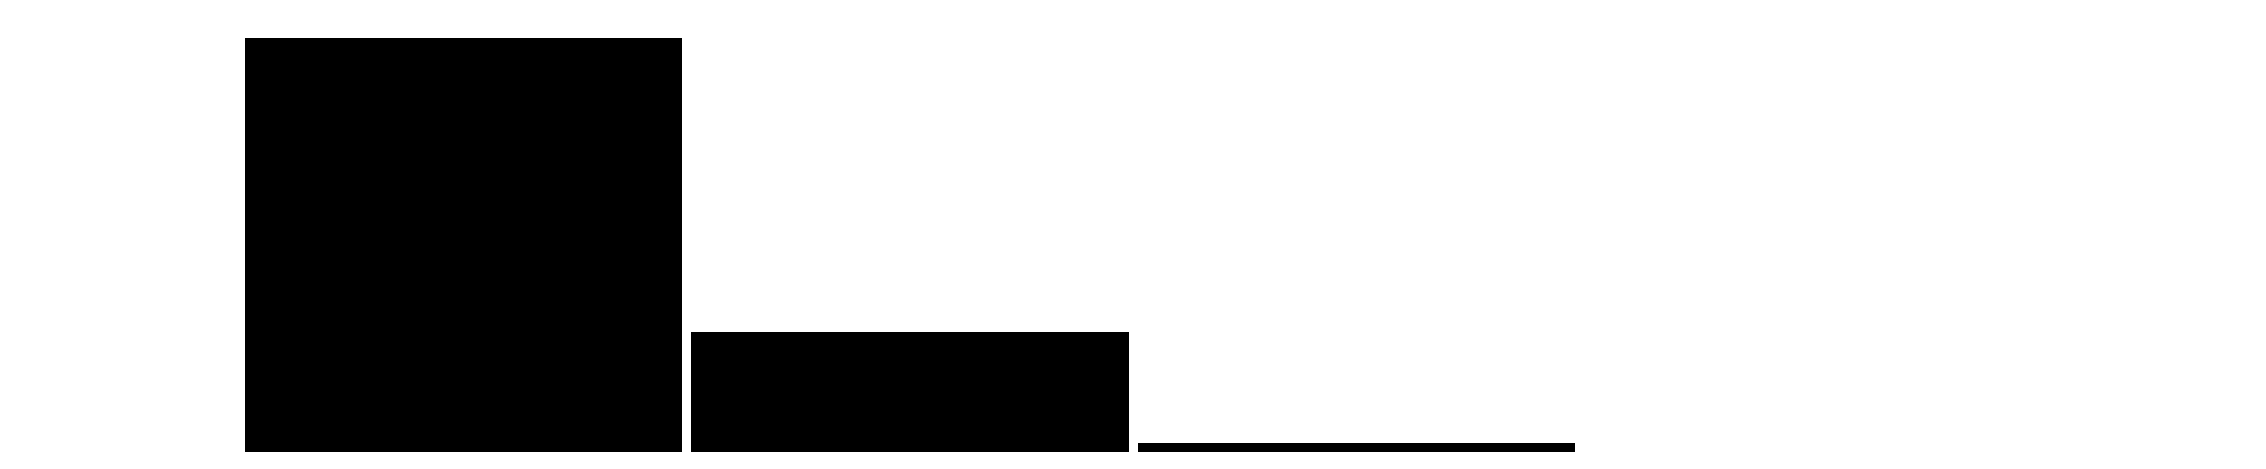

In [108]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()

hist = np.histogram(demographics["neg.affect"].dropna().values, 
                    bins=np.array([i for i in range(0, 60, 10)])/1.0)
plt.bar(hist[1][:-1], hist[0], color="black", width=9.8)
plt.ylabel("")
plt.yticks([])
plt.xticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlim((0, 50))
plt.savefig("output/plots/spike_neg_affect.pdf", bbox_inches="tight", transparent=True)
plt.show()

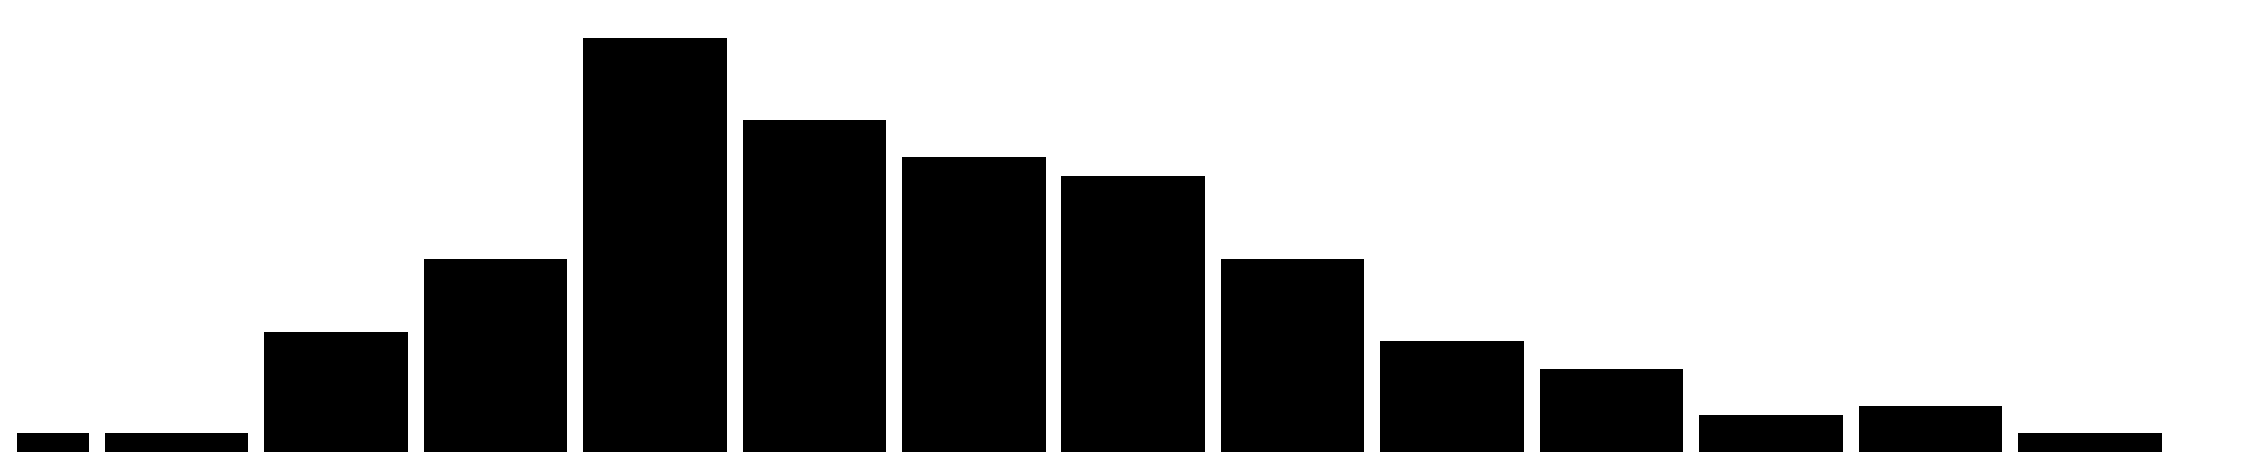

In [109]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()

hist = np.histogram(demographics["psqi"].dropna().values, 
                    bins=np.array([i for i in range(0, 20, 1)])/1.0)
plt.bar(hist[1][:-1], hist[0], color="black", width=0.9)
plt.ylabel("")
plt.yticks([])
plt.xticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlim((1, 15))
plt.savefig("output/plots/spike_psqi.pdf", bbox_inches="tight", transparent=True)
plt.show()

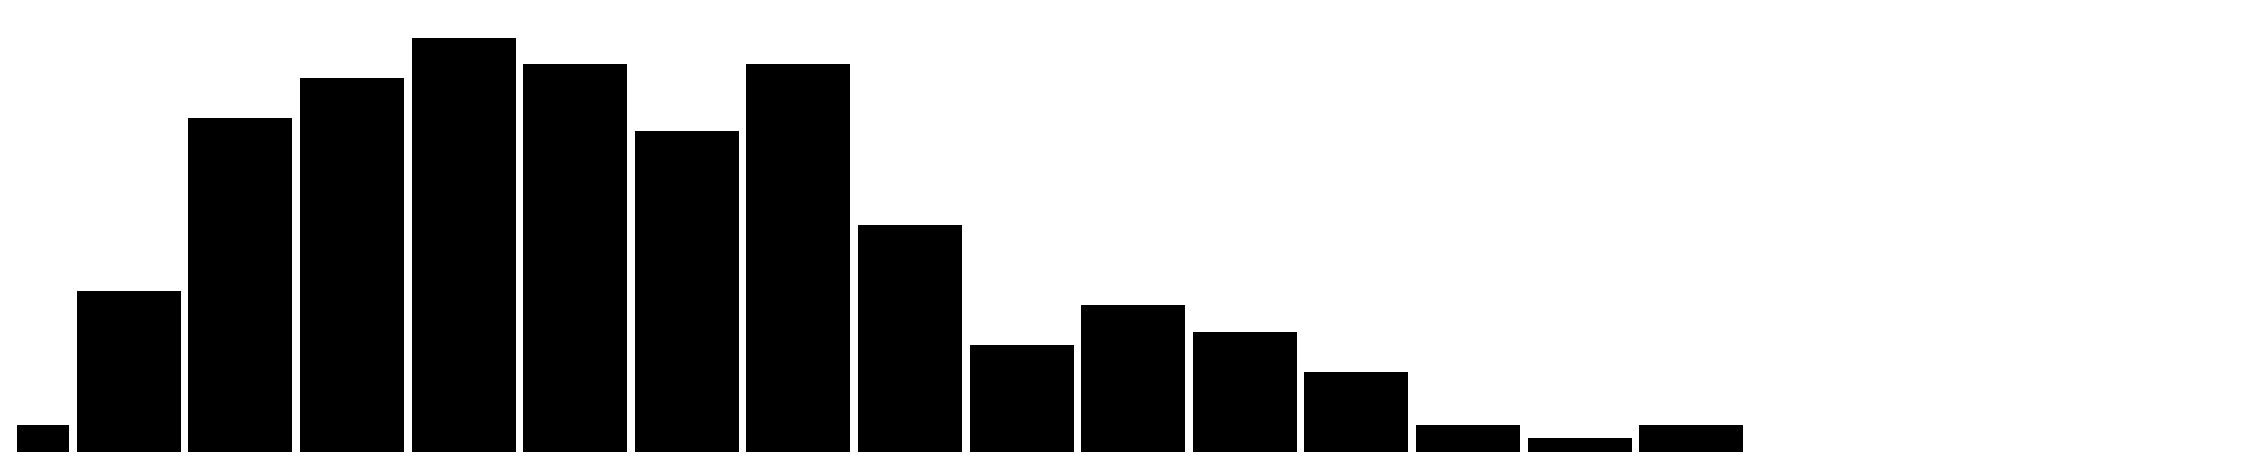

In [110]:
plt.figure(figsize=(40,8))
# plt.rcParams['axes.facecolor'] = 'white'
setupMPPTufte()

hist = np.histogram(demographics["stai.trait"].dropna().values, 
                    bins=np.array([i for i in range(20, 80, 3)])/1.0)
plt.bar(hist[1][:-1], hist[0], color="black", width=2.8)
plt.ylabel("")
plt.yticks([])
plt.xticks([])
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlim((20, 80))
plt.savefig("output/plots/spike_stai_trait.pdf", bbox_inches="tight", transparent=True)
plt.show()

In [111]:
for variable in ["stai.trait", "psqi"]:
    print(variable, demographics[variable].min(), demographics[variable].max(), demographics[variable].mean(), demographics[variable].std())

stai.trait 20.0 67.0 37.83050847457627 9.325147957067731
psqi 1.0 16.0 6.804255319148936 2.57452654736372
